<a href="https://colab.research.google.com/github/LeoMoshiur/cvpr/blob/main/Cat_or_Dog_Object_Detection_CVPR_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data='/content/dataset/'
traindata = os.path.join(data,'training_set')
testdata = os.path.join(data,'test_set')

In [111]:
IMG_SIZE = 200*200
classes = ['ipynb.checkpoint','cat','dog']
CATEGORIES = []

for i in os.listdir(traindata):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['.ipynb_checkpoints', 'cat', 'dog']


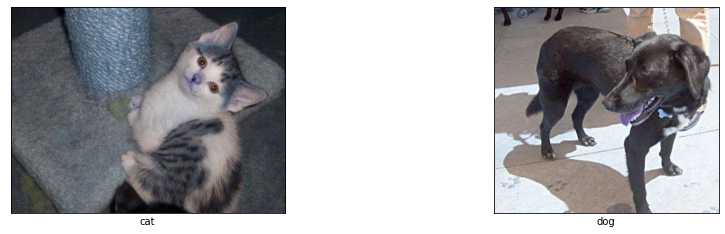

In [112]:
plt.figure(figsize=(32,32))
i=0
for c in CATEGORIES:  
    path = os.path.join(traindata,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

In [113]:
def load_data(traindata):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(traindata),desc='Overall Progress'):
        index +=1
        print('Folder : '+classes[index])
        for image in tqdm(os.listdir(traindata + "/" + folder)):
            try:
                temp_img = cv2.imread(traindata + '/' + folder + '/' + image)
                temp_img = cv2.resize(temp_img, size)
            except Exception as e:
                continue
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    y_train = np.asarray(labels).astype('float32').reshape((-1,1))
    y_test = np.asarray(labels).astype('float32').reshape((-1,1))
    x_train = np.asarray(labels).astype('float32').reshape((-1,1))
    x_test = np.asarray(labels).astype('float32').reshape((-1,1))
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(traindata)
print('Loading:', time() - start)

Overall Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Folder : ipynb.checkpoint


0it [00:00, ?it/s]

Folder : cat


  0%|          | 0/1001 [00:00<?, ?it/s]

Folder : dog


  0%|          | 0/1005 [00:00<?, ?it/s]

Loaded 1803 images for training, Train data shape = (1803, 32, 32, 3)
Loaded 6012 images for testing Test data shape = (6012, 1)
Loading: 5.221524000167847


In [114]:
model = Sequential()

model.add(Convolution2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(29, activation='sigmoid'))

In [115]:
classes = 2
batch = 128
epochs = 5
learning_rate = 0.0001

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 8, 8, 256)        

In [116]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time()
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
train_time = time() - start
print('\nTrain time: ', train_time)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
13/13 [==============================] - 152s 12s/step - loss: 2.3886 - accuracy: 0.6165 - val_loss: 0.8387 - val_accuracy: 0.3315
Epoch 2/5
13/13 [==============================] - 152s 12s/step - loss: 0.8494 - accuracy: 0.4790 - val_loss: 0.6567 - val_accuracy: 0.6685
Epoch 3/5
13/13 [==============================] - 150s 12s/step - loss: 0.6606 - accuracy: 0.6665 - val_loss: 0.6521 - val_accuracy: 0.6685
Epoch 4/5
13/13 [==============================] - 153s 12s/step - loss: 0.6479 - accuracy: 0.6665 - val_loss: 0.6459 - val_accuracy: 0.6685
Epoch 5/5
13/13 [==============================] - 151s 12s/step - loss: 0.6411 - accuracy: 0.6665 - val_loss: 0.6388 - val_accuracy: 0.6685

Train time:  758.1011147499084


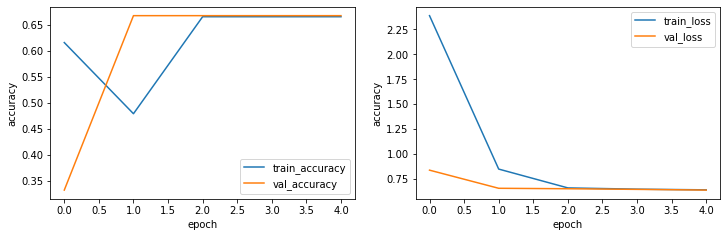

In [117]:
#Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [123]:
start = time()
test_loss, test_acc = model.evaluate(x_test, y_test)
test_time = time() - start
 
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Test time: ', test_time)

ValueError: ignored